In [1]:
import numpy as np

In [2]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# Images fed into this model are 28 x 28 pixels with 1 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 6, 2 by 2 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,2,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 6)         30        
_________________________________________________________________
activation (Activation)      (None, 27, 27, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1014)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10150     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 10,180
Trainable params: 10,180
Non-trainable params: 0
____________________________________________________

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [5]:
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = np.expand_dims(x_train,-1)

In [9]:
x_test = np.expand_dims(x_test,-1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [13]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0671 - acc: 0.9790 - val_loss: 0.1098 - val_acc: 0.9667
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0671 - acc: 0.9788 - val_loss: 0.0972 - val_acc: 0.9717
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0643 - acc: 0.9796 - val_loss: 0.1104 - val_acc: 0.9699
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0605 - acc: 0.9809 - val_loss: 0.1107 - val_acc: 0.9693
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0610 - acc: 0.9799 - val_loss: 0.1135 - val_acc: 0.9706
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0583 - acc: 0.9810 - val_loss: 0.1156 - val_acc: 0.9690
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0591 - acc: 0.9805 - val_loss: 0.1157 - val_acc: 0.9695
Epoch 8/10
1875/1875 [==============================] -

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


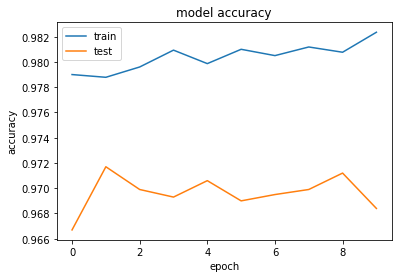

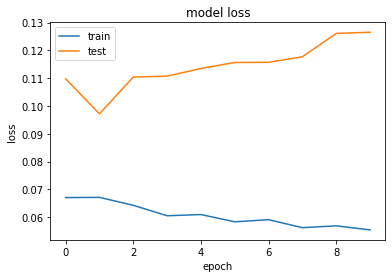

In [15]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

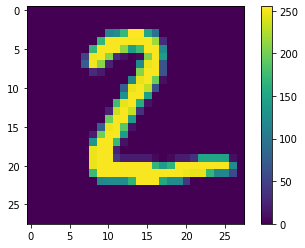

In [24]:
plt.figure()
pixels = x_test[1].reshape(28, 28)
plt.imshow(pixels)
plt.colorbar()
plt.grid(False)
plt.show()

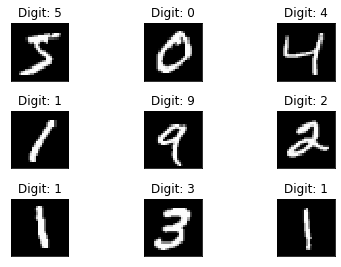

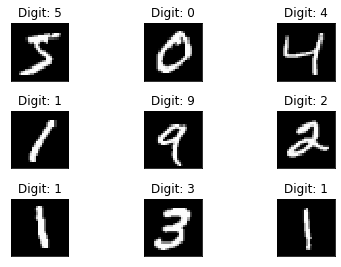

In [29]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9684  classified correctly
316  classified incorrectly


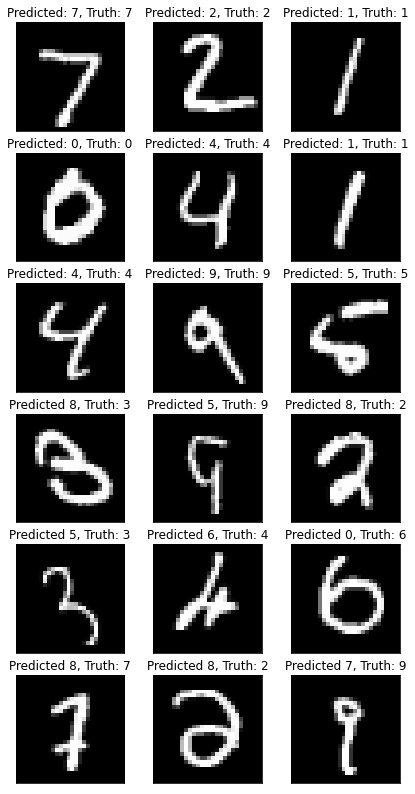

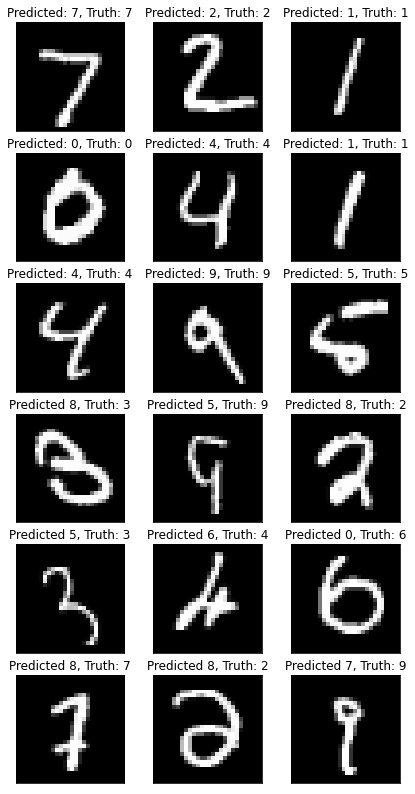

In [30]:
# load the model and create predictions on the test set
# mnist_model = load_model()
predicted_classes = model.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation